## Importing of modules and loading of dataset

In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.datasets
import sklearn.decomposition
import math





missing_values =["N/a", "na", np.nan, "", 0, "NaN"]
energy_data = pd.read_csv("energy-use-per-capita-vs-gdp-per-capita.csv",na_values = missing_values)
meat_data =pd.read_csv("meat-consumption-vs-gdp-per-capita.csv", na_values = missing_values)
health_data =pd.read_csv("healthcare-expenditure-vs-gdp.csv",na_values = missing_values)

### Cleaning of the Dataset
##### Extracting the data between 1990 -2020 and droping the redundant columns 

In [3]:
energy_data = energy_data.drop(['GDP ','Population', 'Continent'],axis =1)
energy_data = energy_data[energy_data.Year >=1990]
meat_data = meat_data.drop(['Entity', 'GDP ','Population', 'Continent'],axis =1)
meat_data = meat_data[meat_data.Year >=1990]
health_data = health_data.drop(['Entity','Population', 'Continent'],axis =1)
health_data =health_data[health_data.Year >=1990]


### Merging of the Dataset

In [4]:
data = pd.merge(pd.merge(energy_data , meat_data, on=['Code', 'Year']), health_data , on=['Code' , 'Year'])

### Training set for the model
##### For training purpose we select USA and India, then check correlation between GDP and different categories

In [5]:
data =data.loc[data['Code'].isin(["IND","USA"])]             # add countries of your choice. 


##### Automatic filling of NA values with ffill and bfill values between two points grouped by country for rest of the data 
###### data = data.interpolate()  

In [6]:
data["Meat_quantity"] = data.groupby('Entity')['Meat_quantity'].transform(lambda x: x.ffill().bfill())
data["Energy_use "] = data.groupby('Entity')['Energy_use '].transform(lambda x: x.ffill().bfill())
data["health_expenditure"] = data.groupby('Entity')['health_expenditure'].transform(lambda x: x.ffill().bfill())
data["GDP "] = data.groupby('Entity')['GDP '].transform(lambda x: x.ffill().bfill())


data =pd.DataFrame(data)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
                            print(data)

               Entity Code    Year   Energy_use   Meat_quantity  \
797508          India  IND  1990.0   4071.380910           4.12   
797509          India  IND  1991.0   4156.175422           4.23   
797510          India  IND  1992.0   4222.601078           4.23   
797511          India  IND  1993.0   4239.303587           4.23   
797512          India  IND  1994.0   4317.357469           4.18   
797513          India  IND  1995.0   4478.618307           4.10   
797514          India  IND  1996.0   4529.030354           4.08   
797515          India  IND  1997.0   4621.508162           4.02   
797516          India  IND  1998.0   4646.171513           4.06   
797517          India  IND  1999.0   4826.013804           4.05   
797518          India  IND  2000.0   4853.054761           3.97   
797519          India  IND  2001.0   4838.247877           4.03   
797520          India  IND  2002.0   4899.375651           4.07   
797521          India  IND  2003.0   4934.543198           4.0

#### Checking the null values

In [7]:
print("Null Values: ")
print(data.isnull().sum())


Null Values: 
Entity                0
Code                  0
Year                  0
Energy_use            0
Meat_quantity         0
health_expenditure    0
GDP                   0
dtype: int64


##### Correlation

In [8]:
print("Correlation co-effecient :")
x = data.loc[:,"Energy_use "]         #0.62 -> moderately correlated
y = data.loc[:,"Meat_quantity"]         #0.275 -> Weakly  correlated
z = data.loc[:,"health_expenditure"]    #0.97 ->strongly correlated
g = data.loc[:,"GDP "]      
year = data.loc[:,"Year"]      

print("Health Expenditure:",(np.corrcoef(z,g))[0][1])
print("Meat Production:",(np.corrcoef(y,g))[0][1])
print("Energy Consumption:",(np.corrcoef(x,g))[0][1])


Correlation co-effecient :
Health Expenditure: 0.993547949458388
Meat Production: 0.918471866629265
Energy Consumption: 0.9085860621788558


#### Scatter plot of GDP vs all other categories to show how they are related to each other.


From the above plot if we consider Energy consumption in relation to GDP then we can infer that for India it's highly correlated and had a rapid growth in the previous few years. Where as for US Energy consumption has been constant from 1990 and had slight decrease during 2009 - 2014. 

##### BAR-PLOT(to analyze GDP growth of India and US)

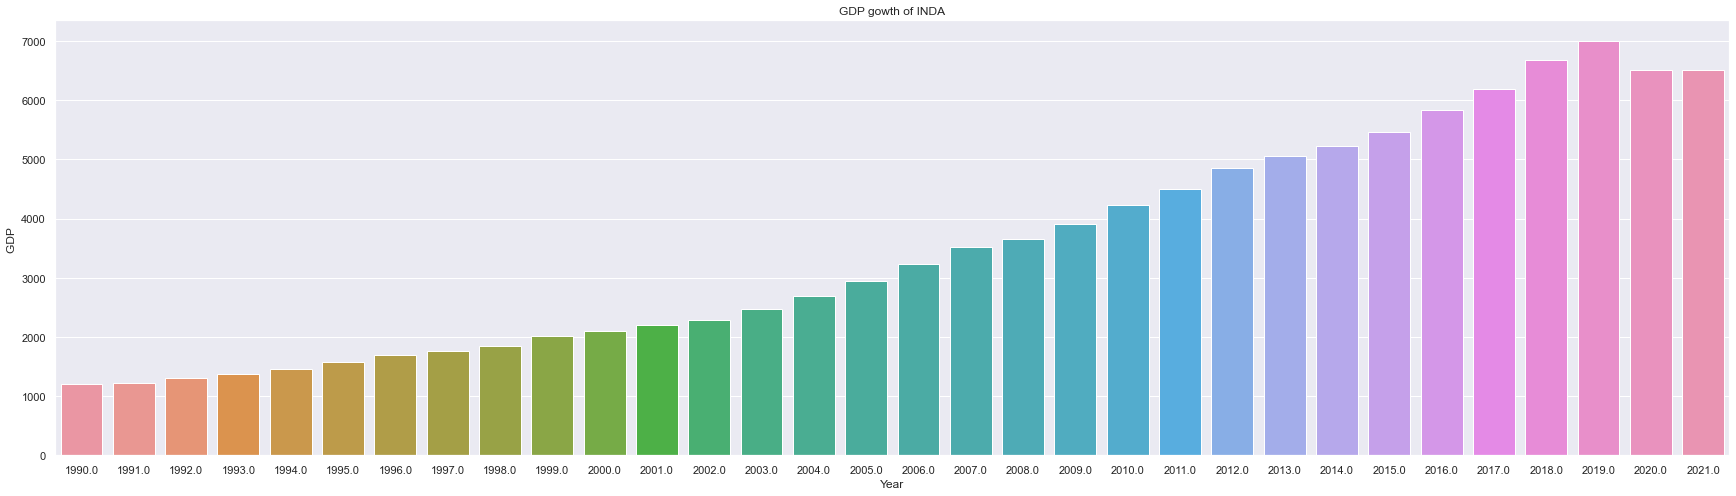

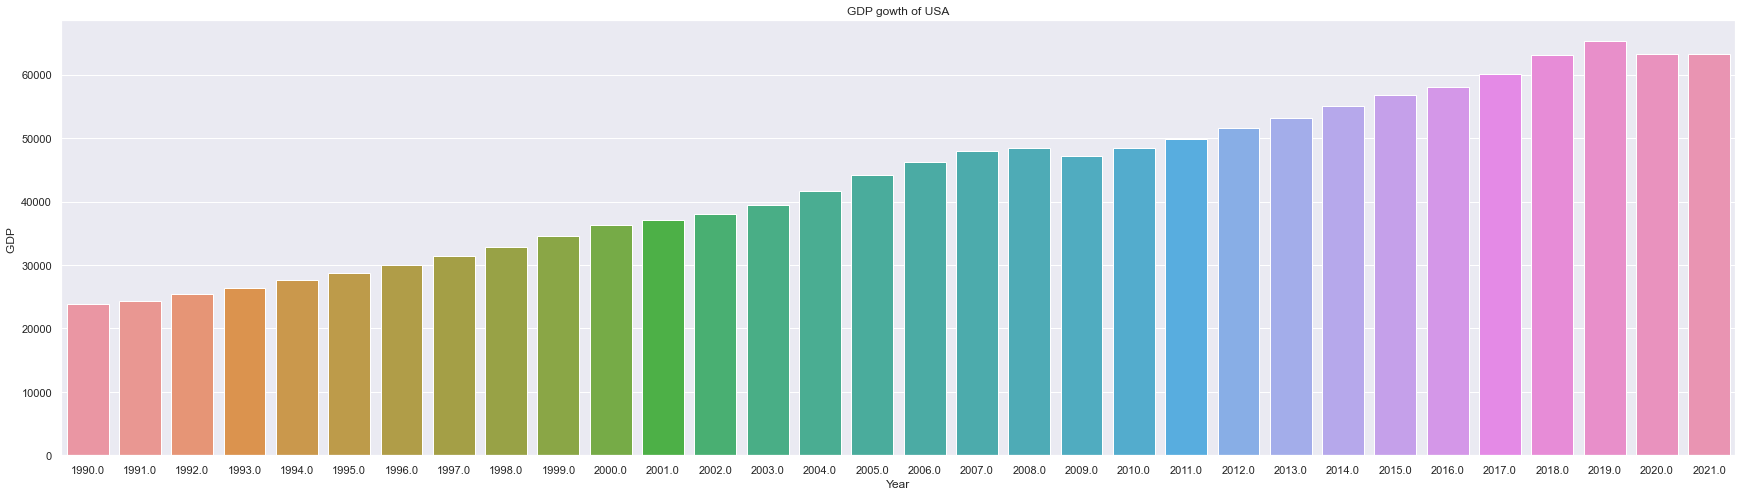

In [9]:
IND=data.loc[data['Code'].isin(["IND"])]
IND_year = IND.loc[:,['Year']]
IND = IND.drop(['Entity', 'Code'],axis =1)


USA=data.loc[data['Code'].isin(["USA"])] 
USA_val = USA.loc[:,'Entity'].values 
USA = USA.drop(['Entity','Code'],axis =1)

sns.set(rc = {'figure.figsize':(30,8)})

sns.barplot(x = 'Year',
            y = 'GDP ',
            data = IND)
plt.title('GDP gowth of INDA')
plt.show()

sns.barplot(x = 'Year',
            y = 'GDP ',
            data = USA)
sns.set(rc = {'figure.figsize':(30,8)})
plt.title('GDP gowth of USA')
plt.show()


Comparing GDP of both countries will be usless as there is a huge difference. 
But if we analyze growth of the country then we can infer that,

The GDP of India while considering purchase power parity into account has a growth rate of 8.95 %, where as USA has a growth rate of 5.67 %.


Text(0.5, 1.0, 'GDP')

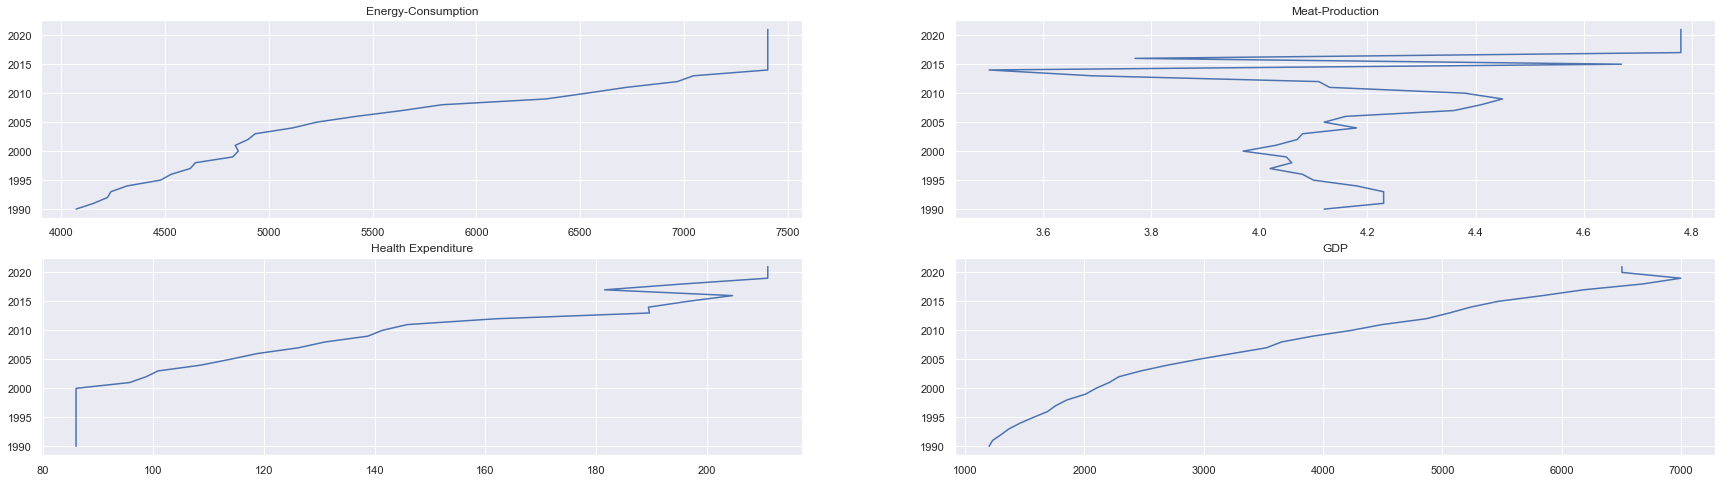

In [32]:
ind_x = IND.loc[:,"Energy_use "]         #0.62 -> moderately correlated
ind_y = IND.loc[:,"Meat_quantity"]         #0.275 -> Weakly  correlated
ind_z = IND.loc[:,"health_expenditure"]    #0.97 ->strongly correlated
ind_g = IND.loc[:,"GDP "]      
ind_year = IND.loc[:,"Year"] 

# Initialise the subplot function using number of rows and columns

figure, axis = plt.subplots(2, 2)
  
axis[0, 0].plot(ind_x, ind_year)
axis[0, 0].set_title("Energy-Consumption")
  
axis[0, 1].plot(ind_y, ind_year)
axis[0, 1].set_title("Meat-Production")
  
axis[1, 0].plot(ind_z, ind_year)
axis[1, 0].set_title("Health Expenditure")
  
axis[1, 1].plot(ind_g, ind_year)
axis[1, 1].set_title("GDP")


Text(0.5, 1.0, 'GDP')

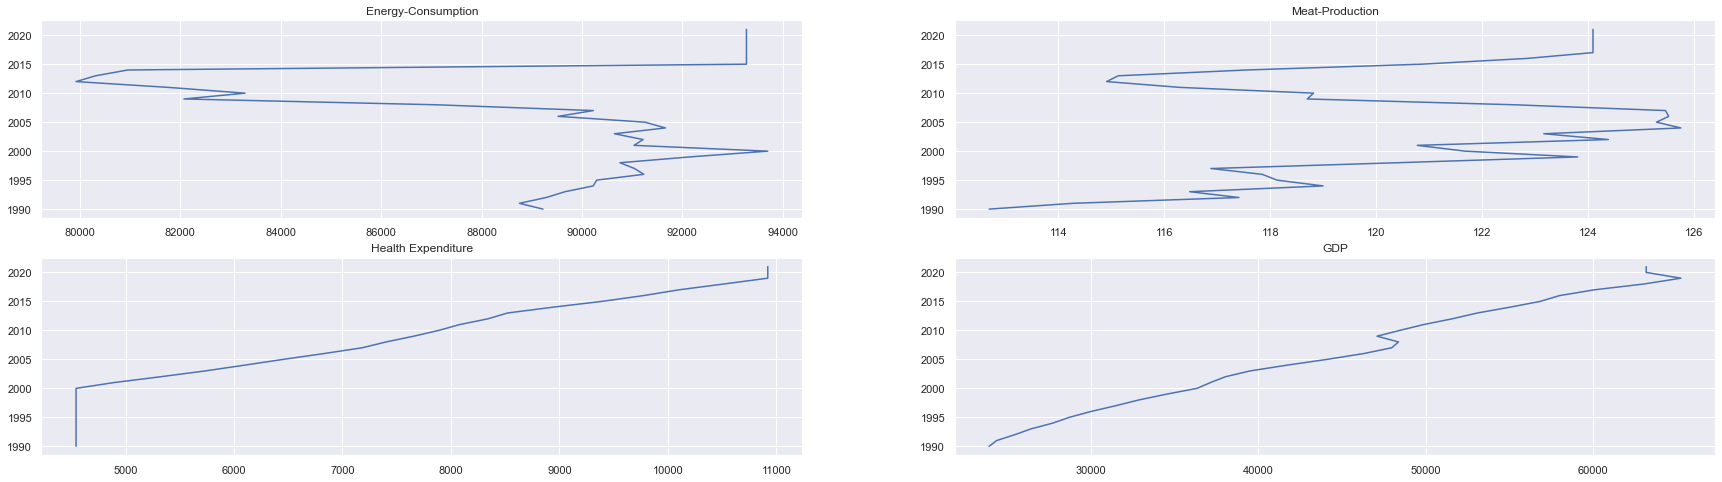

In [25]:
USA_x = USA.loc[:,"Energy_use "]         #0.62 -> moderately correlated
USA_y = USA.loc[:,"Meat_quantity"]         #0.275 -> Weakly  correlated
USA_z = USA.loc[:,"health_expenditure"]    #0.97 ->strongly correlated
USA_g = USA.loc[:,"GDP "]      
USA_year = USA.loc[:,"Year"] 

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(USA_x, USA_year)
axis[0, 0].set_title("Energy-Consumption")
  
# For Cosine Function
axis[0, 1].plot(USA_y, USA_year)
axis[0, 1].set_title("Meat-Production")
  
# For Tangent Function
axis[1, 0].plot(USA_z, USA_year)
axis[1, 0].set_title("Health Expenditure")
  
# For Tanh Function
axis[1, 1].plot(USA_g, USA_year)
axis[1, 1].set_title("GDP")

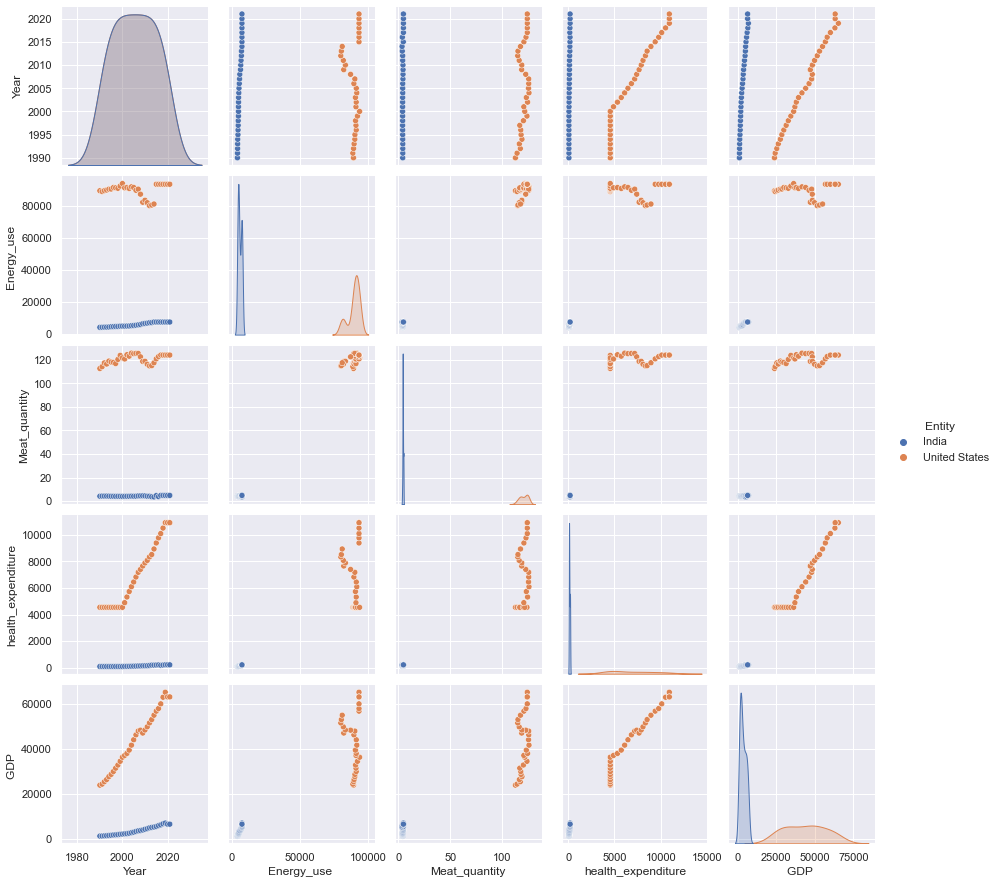

In [ ]:

sns.pairplot(data, hue='Entity')

PCA 

        PCA1      PCA2         Entity
0  -2.164019  1.340000          India
1  -2.148953  1.238845          India
2  -2.134073  1.136971          India
3  -2.119862  1.034856          India
4  -2.104749  0.932740          India
..       ...       ...            ...
59  2.903348 -1.058951  United States
60  3.037739 -1.186419  United States
61  3.154426 -1.309871  United States
62  3.119733 -1.400920  United States
63  3.132227 -1.502773  United States

[64 rows x 3 columns]


Text(0, 0.5, 'PCA 2')

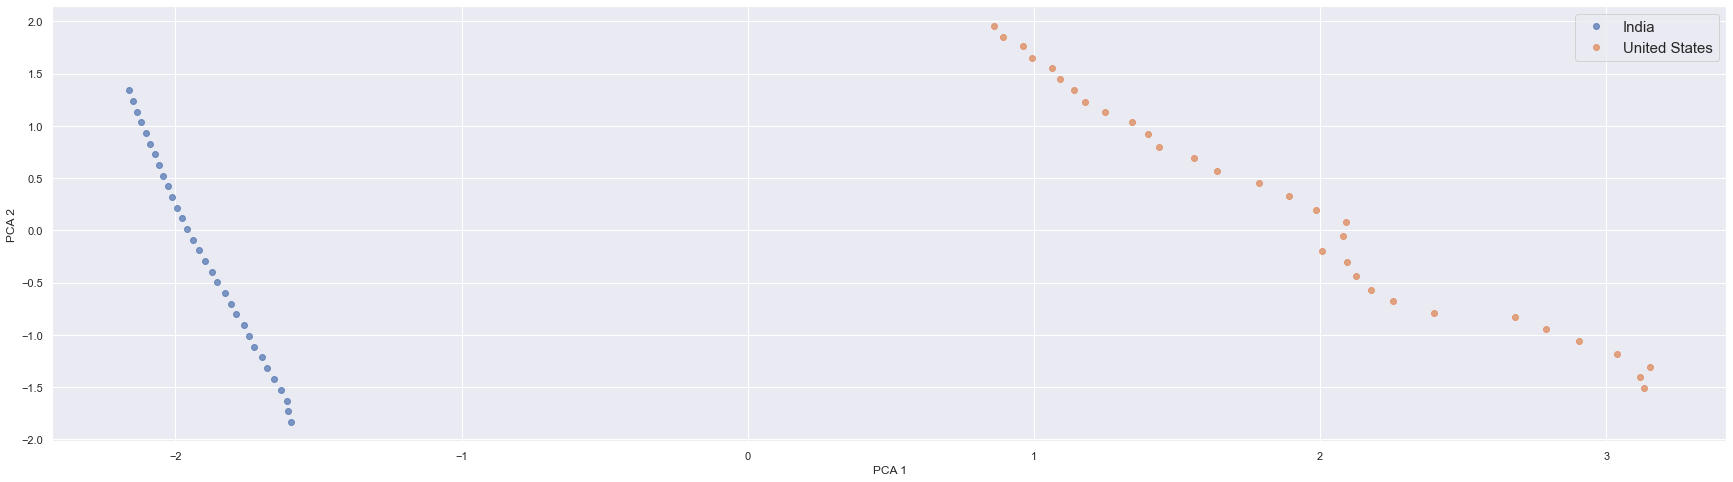

In [ ]:

#normalizing the data
country = data.loc[:,'Entity']
data1 = data.drop(['Entity','Code'],axis =1)
standard_data = StandardScaler().fit_transform(data1)
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])
finalDf = pd.concat([principalDf, country], axis = 1)
print(finalDf)
for key, group in finalDf.groupby(['Entity']):
    plt.plot(group.PCA1, group.PCA2, 'o', alpha=0.7, label=key)
    plt.legend(loc=0, fontsize=15)
plt.margins(0.05)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')



SUMMARY OF EDA

In [ ]:
profile = ProfileReport(data, title ="Summary of Dataset", explorative =True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Key values of dataset

In [ ]:
IND.describe()

,Year,Energy_use,Meat_quantity,health_expenditure,GDP
count,32.000000,32.000000,32.00000,32.000000,32.000000
mean,2005.500000,5740.695653,4.22750,131.820482,3516.533489
std,9.380832,1260.169075,0.32235,47.590498,1901.063814
min,1990.000000,4071.380910,3.50000,86.040833,1200.902466
25%,1997.750000,4640.005675,4.06750,86.040833,1828.986512
50%,2005.500000,5325.982599,4.14500,116.310917,3095.202027
75%,2013.250000,7134.871373,4.38750,183.507790,5101.395630
max,2021.000000,7403.330480,4.78000,211.002228,6997.863770


In [ ]:
USA.describe()

,Year,Energy_use,Meat_quantity,health_expenditure,GDP
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2005.500000,89381.934320,120.538750,6933.417664,43739.050781
std,9.380832,4237.163645,3.836736,2329.556841,12980.020963
min,1990.000000,79921.678010,112.690000,4543.436035,23888.599610
25%,1997.750000,89105.532103,117.522500,4543.436035,32505.041502
50%,2005.500000,90701.981010,120.820000,6641.509766,45206.738280
75%,2013.250000,92429.442460,124.100000,8626.443604,53592.398440
max,2021.000000,93701.325640,125.760000,10921.012700,65279.527340
